In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


Dataset:
Seoul Bike Sharing Demand
Source:https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [90]:
dataset_cols=["Date","Bike_count","hour","Temp","Humidity","Wind","Visibility","Dew_pt_temp","Radiation","Rain","Snow","Seasons","Holiday","Fonctional"]
df = pd.read_csv('SeoulBikeData_2.csv', sep=';', encoding='latin-1')

In [91]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Remove features that seems to be useless

In [93]:
df=df.drop(["Date","Holiday","Seasons"],axis=1)

In [92]:
df.columns=dataset_cols
df.head()

,Date,Bike_count,hour,Temp,Humidity,Wind,Visibility,Dew_pt_temp,Radiation,Rain,Snow,Seasons,Holiday,Fonctional
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [94]:
df["Fonctional"]=(df["Fonctional"]=="Yes").astype(int)
df.head()

,Bike_count,hour,Temp,Humidity,Wind,Visibility,Dew_pt_temp,Radiation,Rain,Snow,Fonctional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [96]:
df=df[df["hour"]==12]
df.head()

,Bike_count,hour,Temp,Humidity,Wind,Visibility,Dew_pt_temp,Radiation,Rain,Snow,Fonctional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [97]:
df=df.drop(["hour"],axis=1)
df.head()

,Bike_count,Temp,Humidity,Wind,Visibility,Dew_pt_temp,Radiation,Rain,Snow,Fonctional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


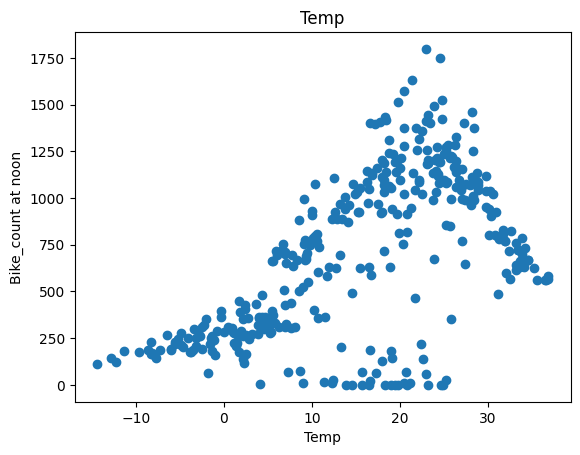

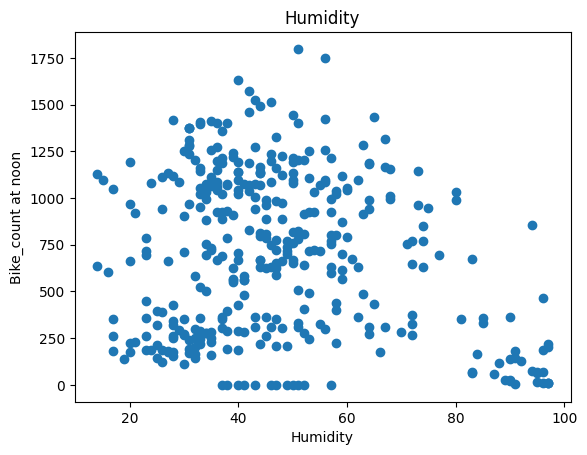

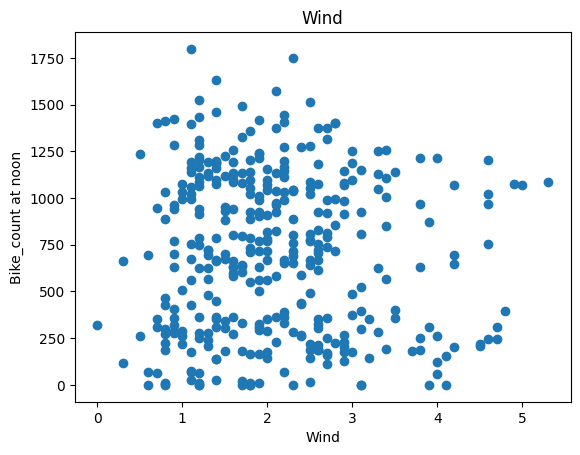

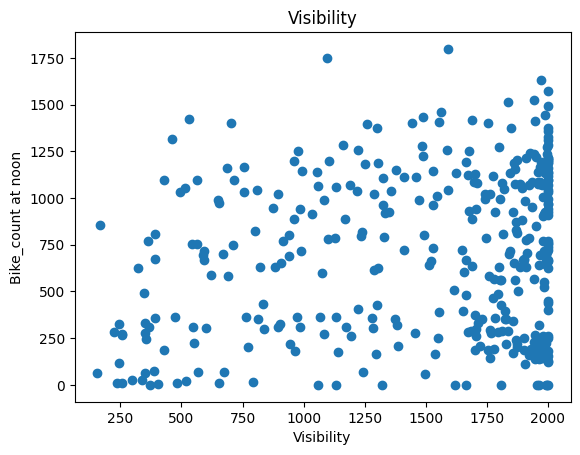

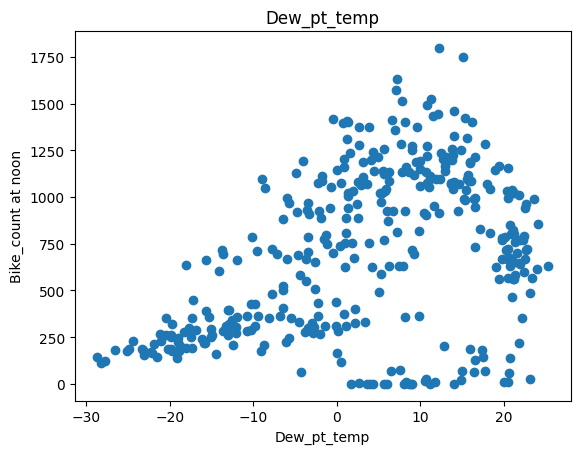

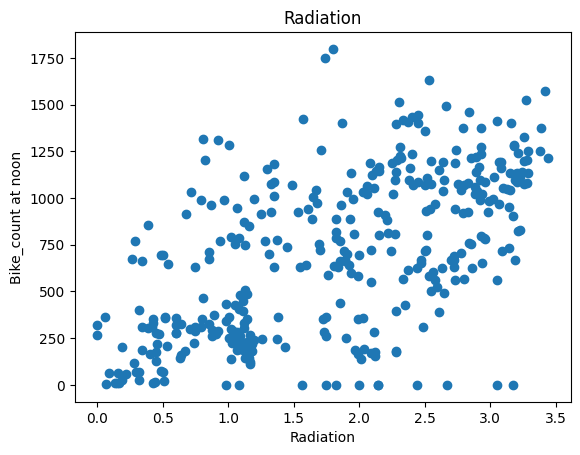

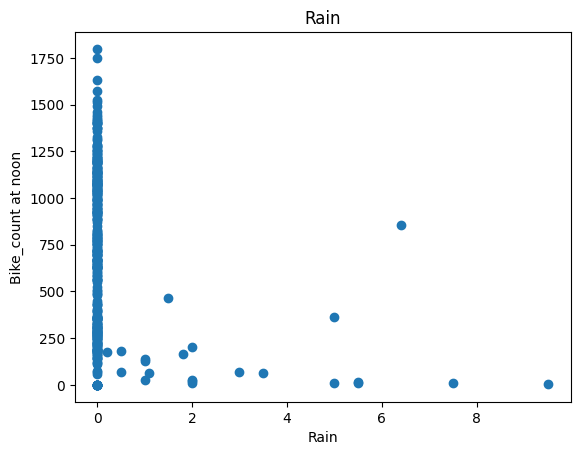

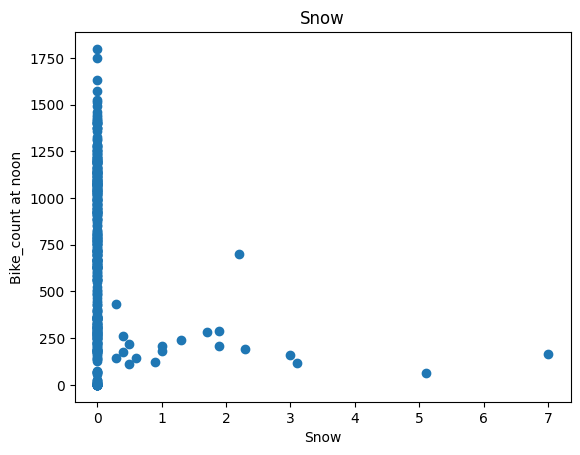

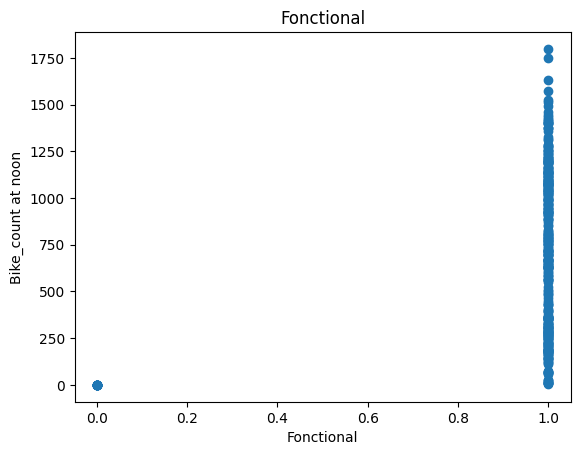

In [98]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["Bike_count"])
  plt.title(label)
  plt.ylabel("Bike_count at noon")
  plt.xlabel(label)
  plt.show()

In [99]:
df=df.drop(["Visibility","Wind","Fonctional"],axis=1)
df.head()

,Bike_count,Temp,Humidity,Dew_pt_temp,Radiation,Rain,Snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/test/validation dataset

In [155]:
train, val, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [156]:
def get_xy(dataframe,y_label,x_label=None):
  dataframe=copy.deepcopy(dataframe)
  if x_label is None:
    X=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_label)==1:
      X=dataframe[x_label[0]].values.reshape(-1,1)
    else:
      X=dataframe[x_label].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y


In [157]:
_,X_train_temp,y_train_temp=get_xy(train,"Bike_count",x_label=["Temp"])
_,X_val_temp,y_val_temp=get_xy(val,"Bike_count",x_label=["Temp"])
_,X_test_temp,y_test_temp=get_xy(test,"Bike_count",x_label=["Temp"])

In [158]:
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [159]:
temp_reg.score(X_test_temp,y_test_temp)

0.44426132197009427

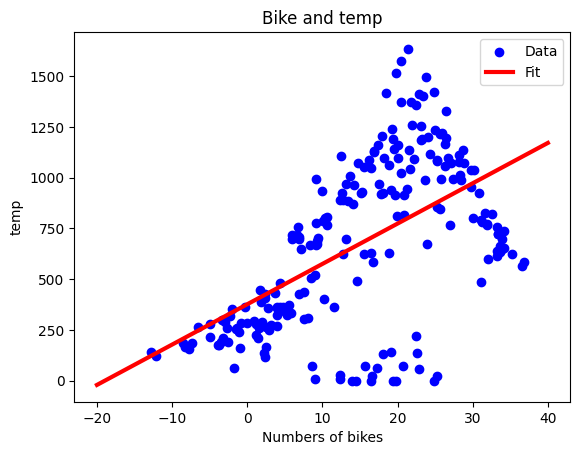

In [160]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bike and temp")
plt.xlabel("Numbers of bikes")
plt.ylabel("temp")
plt.show()

# Multiple linear regression

In [161]:
train, val, test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,X_train_all,y_train_all=get_xy(train,"Bike_count",x_label=df.columns[1:])
_,X_val_all,y_val_all=get_xy(val,"Bike_count",x_label=df.columns[1:])
_,X_test_all,y_test_all=get_xy(test,"Bike_count",x_label=df.columns[1:])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [162]:
all_reg=LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [163]:
all_reg.score(X_test_all,y_test_all)

0.3438062801506444